# Assignment 1 - Clustering
### Modeling & Optimization
### Ethan Witkowski

In [65]:
#Task 1
#Implement k-means algorithm as a 'k-means' function
#Refer to <http://vmls-book.stanford.edu/vmls.pdf> Chapter 4

import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt 
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib.animation as animation
from IPython.display import HTML
import pandas as pd

In [2]:
#Initialize (1)

def initialize(x):

    z = np.array([])                               #Define empty representative vector z
        
        #Identify max/min values for each dimension
        #Produce k random values within max/min range for each dimension (place in y)
        #Concatenate random values (y) into representative vector z

    for n in range(len(x[0])):                     #for each dimension in array [0]
        xmin = x[0][n]                             #set element as min for dimension n
        xmax = x[0][n]                             #set element as max for dimension n

        for i in range(len(x)):                    #for each vector
            if x[i][n] > xmax:                     #determine if element in dimension is greater than max
                xmax = x[i][n]                     #if yes, set as max
            if x[i][n] < xmin:                     #determine if element in dimension is smaller than min
                xmin = x[i][n]                     #if yes, set as min
        y = np.random.randint(xmin,xmax+1,k)       #produce k random integers between min and max for each dimension
        z = np.concatenate((z,y),axis=0)           #concatenate to z

    #Reshape z into correct representative vector format
    z = np.reshape(z, (len(x[0]),k))
    z = z.T

    return z


In [3]:
#Initialize (2)

#Set each representative vector as the ith x vector

def second_initialize(x):

    z = []                   #Define empty representative vector z

    for i in range(k):       #For each cluster
        y = x[i]             #Holder variable is equal to ith x-vector
        z.append(y)          #Append to variable z
    
    return z

The second initialization type used is MacQueen's method.

"MacQueen (1967) proposed two different methods. The first
one, which is the default option in the Quick Cluster procedure
of IBM SPSS Statistics (Norušis, 2011), takes the first K points in
X as the centers. An obvious drawback of this method is its sensitivity to data ordering."

M. Emre Celebi, Hassan A. Kingravi, Patricio A. Vela, A comparative study of efficient initialization methods for the k-means clustering algorithm, Expert Systems with Applications, Volume 40, Issue 1, 2013.

MacQueen, J. (1967). Some methods for classification and analysis of multivariate
observations, In: Proc. of the 5th Berkeley symposium on mathematical statistics
and probability (pp. 281–297).

The primary method I chose to use is shown in the initalize(x) function. This method calculates the minimum and maximum value for each dimension, and assigns a random value to each dimension in each representative vector within this minimum/maximum range. This is a more effective initialization method, as it avoids ranking bias.

In [4]:
#Assign each x vector to a representative vector

def cluster_min_distance(x,z):

    #Create c vector

    c = np.zeros(len(x))

    for i, xvector in enumerate(x):                      #Access each vector in x
        mindist = np.inf                                 #Initial minimum norm 
        zmin = z[0]                                      #Initial closest representative vector is first

        for j, zvector in enumerate(z):                  #Index each vector in z
            dist = np.linalg.norm(xvector - zvector)     #Calculate distance from z vector
            if dist < mindist:
                zmin = zvector                           #if minimum distance, define as zmin
                mindist = dist                           #update minimum distance
                c[i] = j                                 #assign c as index of minimum distance z vector
    

    return c


In [5]:
#Reassign z vector as centroid of cluster

def centroid_representatives(x,z,c):

    clusters = []                                    #List that holds clusters

    for i in range(k):                               #List that holds all vectors in each cluster
        cluster = []

        for j,xvector in enumerate(x):               #For all x vectors
            if c[j] == i:                            #If index in c vector matches cluster
                cluster.append(xvector)              #Assign x vector to cluster
        clusters.append(cluster)                     #Assign cluster to list of clusters

    clusters = np.array(clusters)

    #Assign centroid of clustered vectors as new z vectors

    for i, clustvectors in enumerate(clusters):      #For all cluster in cluster list

        meanvector = np.mean(clustvectors,axis=0)    #Calculate mean/centroid of cluster
        z[i] = meanvector                            #Assign mean as new z vector


    return z, clusters

In [6]:
#Calculate J_clust - (value to be minimized)

def Jclust(clusters, z, x):
    
    J_clust = 0

    for i in range(len(clusters)):                   #For each cluster
        cluster = clusters[i]                        #Declare variable cluster as this iteration's cluster
        J_clust_k = 0                                

        for j, xvector in enumerate(cluster):        #For each vector in cluster
            dist = np.linalg.norm(xvector - z[i])    #Declare dist as norm of distance bewteen vector and its representative
            squared_dist = dist ** 2                 #Square dist
            J_clust_k = J_clust_k + squared_dist     #Aggregate J_clust value for cluster

        J_clust = J_clust + J_clust_k                #Aggregate J_clust of all clusters

    J_clust = J_clust / len(x)                       #Divide J_clust by number of x vectors


    return J_clust

In [7]:
#k-means function

def k_means(k,x):
    
    z = initialize(x)                                              #Initialize representative vectors

    for i in range(20):                                            #Determine number of iterations algorithm runs
        c = cluster_min_distance(x,z)                              #Cluster each x vector with closest z vector
        z,cluster_vectors = centroid_representatives(x,z,c)        #Reassign representative vector of each cluster as centroid
        J_c = Jclust(cluster_vectors, z, x)                        #Output J_clust value

    return c,z,J_c 


In [8]:
#k-means function, second method of initialization

def second_k_means(k,x):
    
    z = second_initialize(x)                                       #Initialize representative vectors

    for i in range(20):                                            #Determine number of iterations algorithm runs
        c = cluster_min_distance(x,z)                              #Cluster each x vector with closest z vector
        z,cluster_vectors = centroid_representatives(x,z,c)        #Reassign representative vector of each cluster as centroid
        J_c = Jclust(cluster_vectors, z, x)                        #Output J_clust value

    return c,z,J_c 

In [9]:
#Define number of clusters
k = 3
print("The number of clusters is " + str(k) + "\n")

#Define vectors in x
x, s = make_blobs(n_samples=20, centers=3, n_features=2)
x = np.array(x)

#Break if more clusters than x vectors   
if k > len(x):
      print("Error: Number of clusters can not exceed number of x vectors")

The number of clusters is 3



In [10]:
#Call k_means
#Array error indicates one cluster has been dropped

c,z,J_c = k_means(k,x)

In [11]:
#Task 2
#Visualize k-means algorithm

In [12]:
#k-means visualization

def visualize(k,x,c,x_dir,y_dir,title):
    
    #Declare dimensions of plot
    x_ = x[:,x_dir]
    y = x[:,y_dir]
    
    #Define colors
    cluster_color = ['r' 'b', 'c', 'm', 'g', 'y']
        
    #Visualize    
    for i, assigned_cluster in enumerate(c): 
        
        visual = plt.scatter(x_[i], y[i], c = cluster_color[int(assigned_cluster)], s = 15)  
        plt.title(title)        
        

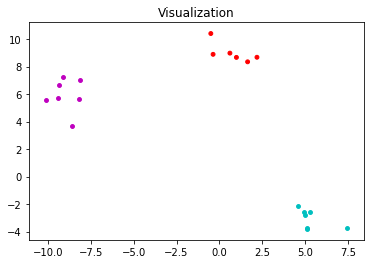

In [13]:
#Visualization

#Declare dimensions
x_dir = 0
y_dir = 1

#Declare title
title = "Visualization"

visual = visualize(k,x,c,x_dir,y_dir,title)

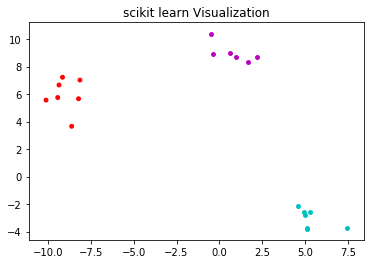

In [14]:
#scikit learn Visualization

#Declare dimensions
x_dir = 0
y_dir = 1

#Declare title
title = "scikit learn Visualization"

visualize(k,x,s,x_dir,y_dir,title)

In [15]:
#Task 3
#Test algorithm and visualization

The number of clusters is 3

Final J_clust value is 2.1979926470198903



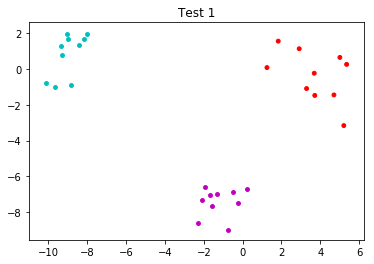

In [50]:
#Test 1

#Define number of clusters
k = 3
print("The number of clusters is " + str(k) + "\n")

#Define vectors in x
x, s = make_blobs(n_samples=30, centers=3, n_features=2)
x = np.array(x)

#Break if more clusters than x vectors   
if k > len(x):
      print("Error: Number of clusters can not exceed number of x vectors \n")
        
c,z,J_c = k_means(k,x)
print("Final J_clust value is " + str(J_c) + "\n")

title = "Test 1"

visualize(k,x,c,x_dir,y_dir,title)

The number of clusters is 3

Final J_clust value is 14.491173606529022



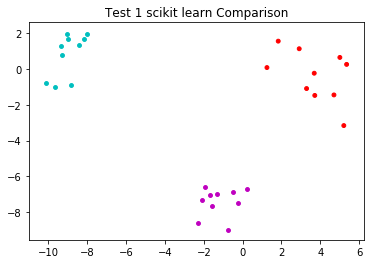

In [51]:
#Test 1 scikit learn comparison

#Define number of clusters
k = 3
print("The number of clusters is " + str(k) + "\n")

#Break if more clusters than x vectors   
if k > len(x):
      print("Error: Number of clusters can not exceed number of x vectors \n")
        
c,z,J_c = k_means(k,x)
print("Final J_clust value is " + str(J_c) + "\n")

title = "Test 1 scikit learn Comparison"

visualize(k,x,s,x_dir,y_dir,title)

The number of clusters is 4

Final J_clust value is 1.7491623999225938



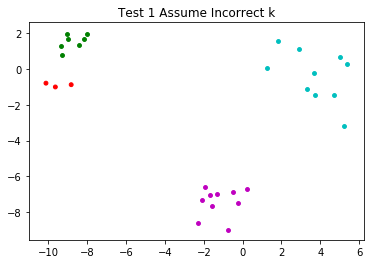

In [52]:
#Test 1 assume incorrect k

#Define number of clusters
k = 4
print("The number of clusters is " + str(k) + "\n")
        
c,z,J_c = k_means(k,x)
print("Final J_clust value is " + str(J_c) + "\n")

title = "Test 1 Assume Incorrect k"

visualize(k,x,c,x_dir,y_dir,title)

The number of clusters is 3

Final J_clust value is 2.1979926470198903



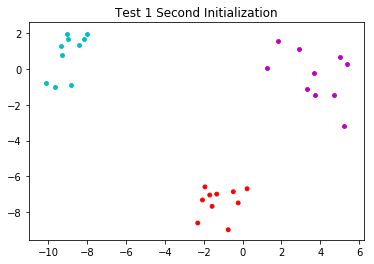

In [53]:
#Test 1 with Second Initialization

#Define number of clusters
k = 3
print("The number of clusters is " + str(k) + "\n")

#Break if more clusters than x vectors   
if k > len(x):
      print("Error: Number of clusters can not exceed number of x vectors \n")
        
c,z,J_c = second_k_means(k,x)
print("Final J_clust value is " + str(J_c) + "\n")

title = "Test 1 Second Initialization"

visualize(k,x,c,x_dir,y_dir,title)

The algorithm was able to find the correct clustering and centroids. Assuming an incorrect k (one unit larger) forced one blob to be separated into two clusters, while keeping the two other blobs the same. Using the second initialization method did not change the clustering.

The number of clusters is 4

Final J_clust value is 1.681635962989396



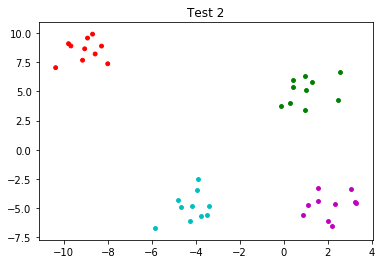

In [55]:
#Test 2

#Define number of clusters
k = 4
print("The number of clusters is " + str(k) + "\n")

#Define vectors in x
x, s = make_blobs(n_samples=40, centers=4, n_features=2)
x = np.array(x)

#Break if more clusters than x vectors   
if k > len(x):
      print("Error: Number of clusters can not exceed number of x vectors \n")
        
c,z,J_c = k_means(k,x)
print("Final J_clust value is " + str(J_c) + "\n")

title = "Test 2"

visualize(k,x,c,x_dir,y_dir,title)

The number of clusters is 4

Final J_clust value is 1.681635962989396



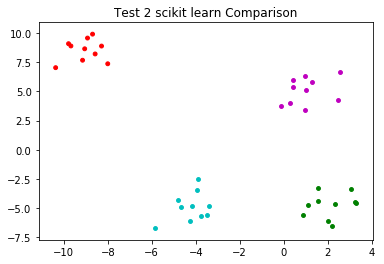

In [56]:
#Test 2 scikit learn comparison

#Define number of clusters
k = 4
print("The number of clusters is " + str(k) + "\n")

#Break if more clusters than x vectors   
if k > len(x):
      print("Error: Number of clusters can not exceed number of x vectors \n")
        
c,z,J_c = k_means(k,x)
print("Final J_clust value is " + str(J_c) + "\n")

title = "Test 2 scikit learn Comparison"

visualize(k,x,s,x_dir,y_dir,title)

The number of clusters is 3

Final J_clust value is 6.71756657417149



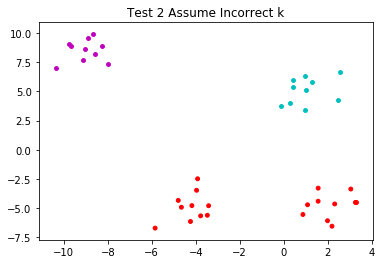

In [57]:
#Test 2 assume incorrect k

#Define number of clusters
k = 3
print("The number of clusters is " + str(k) + "\n")
        
c,z,J_c = k_means(k,x)
print("Final J_clust value is " + str(J_c) + "\n")

title = "Test 2 Assume Incorrect k"

visualize(k,x,c,x_dir,y_dir,title)

The number of clusters is 4

Final J_clust value is 6.47900313087256



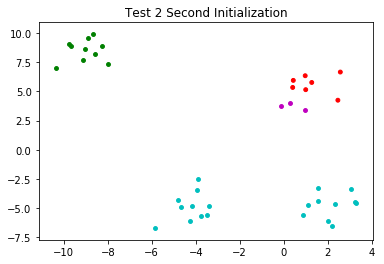

In [58]:
#Test 2 with Second Initialization

#Define number of clusters
k = 4
print("The number of clusters is " + str(k) + "\n")

#Break if more clusters than x vectors   
if k > len(x):
      print("Error: Number of clusters can not exceed number of x vectors \n")
        
c,z,J_c = second_k_means(k,x)
print("Final J_clust value is " + str(J_c) + "\n")

title = "Test 2 Second Initialization"

visualize(k,x,c,x_dir,y_dir,title)

The algorithm was able to find the correct clustering and centroids. Assuming an incorrect k (one unit smaller) forced two blobs to be clustered as one, while keeping the two other blobs the same. Using the second initialization method the result did change, as the blobs were clustered incorrectly.

The number of clusters is 4

Final J_clust value is 2.1377150485849574



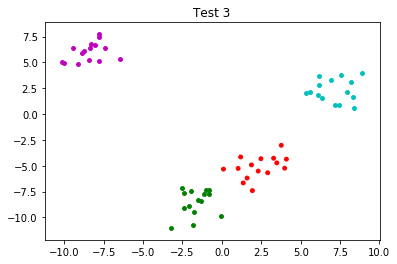

In [59]:
#Test 3

#Define number of clusters
k = 4
print("The number of clusters is " + str(k) + "\n")

#Define vectors in x
x, s = make_blobs(n_samples=60, centers=4, n_features=2)
x = np.array(x)

#Break if more clusters than x vectors   
if k > len(x):
      print("Error: Number of clusters can not exceed number of x vectors \n")
        
c,z,J_c = k_means(k,x)
print("Final J_clust value is " + str(J_c) + "\n")

title = "Test 3"

visualize(k,x,c,x_dir,y_dir,title)

The number of clusters is 4

Final J_clust value is 5.616201629281319



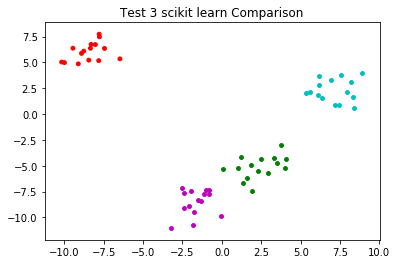

In [60]:
#Test 3 scikit learn comparison

#Define number of clusters
k = 4
print("The number of clusters is " + str(k) + "\n")

#Break if more clusters than x vectors   
if k > len(x):
      print("Error: Number of clusters can not exceed number of x vectors \n")
        
c,z,J_c = k_means(k,x)
print("Final J_clust value is " + str(J_c) + "\n")

title = "Test 3 scikit learn Comparison"

visualize(k,x,s,x_dir,y_dir,title)

The number of clusters is 5

Final J_clust value is 1.83762405955703



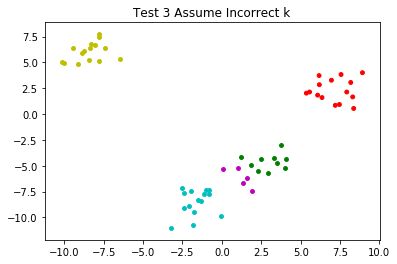

In [62]:
#Test 3 assume incorrect k

#Define number of clusters
k = 5
print("The number of clusters is " + str(k) + "\n")
        
c,z,J_c = k_means(k,x)
print("Final J_clust value is " + str(J_c) + "\n")

title = "Test 3 Assume Incorrect k"

visualize(k,x,c,x_dir,y_dir,title)

The number of clusters is 4

Final J_clust value is 2.1377150485849574



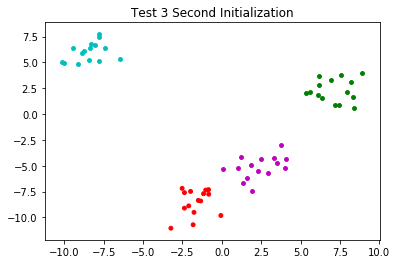

In [63]:
#Test 3 with Second Initialization

#Define number of clusters
k = 4
print("The number of clusters is " + str(k) + "\n")

#Break if more clusters than x vectors   
if k > len(x):
      print("Error: Number of clusters can not exceed number of x vectors \n")
        
c,z,J_c = second_k_means(k,x)
print("Final J_clust value is " + str(J_c) + "\n")

title = "Test 3 Second Initialization"

visualize(k,x,c,x_dir,y_dir,title)

The algorithm was able to find the correct clustering and centroids. Assuming an incorrect k (one unit larger) forced one blob to be separated into two clusters, while keeping the two other blobs the same. Using the second initialization method did not change the clustering.

In [20]:
#Task 4
#Create an animation of the clustering process

In [ ]:
#The code below facilitated taking images of the clusters during each iteration
#The images were then transferred to .gif format

'''
#Define number of clusters
k = 4
print("The number of clusters is " + str(k) + "\n")

#Define vectors in x
x, s = make_blobs(n_samples=700, centers=4, n_features=2)
x = np.array(x)

z = initialize(x)                                             #Initialize representative vectors
    
-------------------------------------------------------------------------------------------------    
    
for i in range(1):                                             #Determine number of iterations algorithm runs
    c = cluster_min_distance(x,z)                              #Cluster each x vector with closest z vector
    z,cluster_vectors = centroid_representatives(x,z,c)        #Reassign representative vector of each cluster as centroid
    J_c = Jclust(cluster_vectors, z, x)                        #Output J_clust value
    
    #Declare dimensions of plot
    x_ = x[:,x_dir]
    y = x[:,y_dir]
    
    #Define colors
    cluster_color = ['r' 'b', 'c', 'm', 'g', 'y']
        
    #Visualize    
    for i, assigned_cluster in enumerate(c): 
        
        visual = plt.scatter(x_[i], y[i], c = cluster_color[int(assigned_cluster)], s = 15)  
        plt.title("Animated k-means")
        
    visual.figure.savefig('kmeans.png')
    
'''

In [107]:
#Place animation in notebook

HTML('''<div style="display: flex; justify-content: row;">
    <iframe src="https://giphy.com/embed/H7NpBr8qFn7JgS8nbj" width="480" height="320" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/H7NpBr8qFn7JgS8nbj">via GIPHY</a></p>
</div>''')

In [64]:
#Task 5
#Cluster real-world data

In [98]:
#Cluster along the dimensions of average avocado price in the United States (regional data) and total volume of avocados sold

#Import data
avocado = pd.read_csv("Avocado_Data.csv")

In [99]:
#Transfer data to np array
np_avocado = np.array(avocado)

In [109]:
#Define number of clusters
k = 2

#Run k-means with avocado data
c,z,J_c = k_means(k,np_avocado)

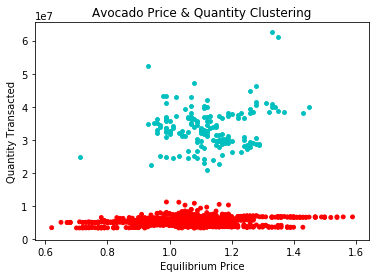

In [110]:
#Avocado Visualization

title = "Avocado Price & Quantity Clustering"
plt.xlabel("Equilibrium Price")
plt.ylabel("Quantity Transacted")

visualize(k,np_avocado,c,x_dir,y_dir,title)


In [103]:
#Trial and Error - too many clusters

#Define number of clusters
k = 4

#Run k-means with avocado data
c,z,J_c = k_means(k,np_avocado)

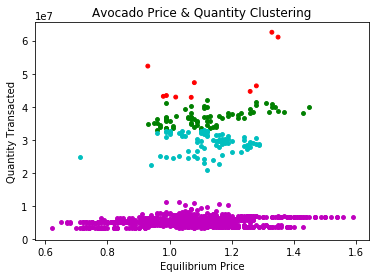

In [104]:
#Avocado Visualization (too many clusters)

title = "Avocado Price & Quantity Clustering"
plt.xlabel("Equilibrium Price")
plt.ylabel("Quantity Transacted")

visualize(k,np_avocado,c,x_dir,y_dir,title)

In [107]:
#Trial and Error - MacQueen Initialization

#Define number of clusters
k = 2

#Run k-means with avocado data
c,z,J_c = second_k_means(k,np_avocado)

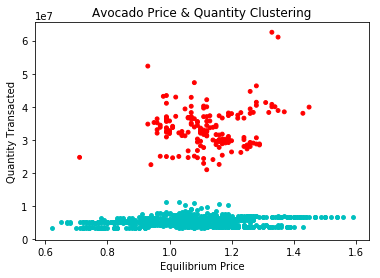

In [108]:
#Avocado Visualization (MacQueen Initialization)

title = "Avocado Price & Quantity Clustering"
plt.xlabel("Equilibrium Price")
plt.ylabel("Quantity Transacted")

visualize(k,np_avocado,c,x_dir,y_dir,title)

In [ ]:
#The code below facilitated taking images of the clusters during each iteration
#The images were then transferred to .gif format

'''
#Animated Plot

#Define number of clusters
k = 2

np_avocado = np.array(avocado)

z = initialize(np_avocado)                                              #Initialize representative vectors

--------------------------------------------------------------------------------------------------------

for i in range(1):                                                      #Determine number of iterations algorithm runs
    c = cluster_min_distance(np_avocado,z)                              #Cluster each x vector with closest z vector
    z,cluster_vectors = centroid_representatives(np_avocado,z,c)        #Reassign representative vector of each cluster as centroid
    J_c = Jclust(cluster_vectors, z, np_avocado)                        #Output J_clust value
    
    #Declare dimensions of plot
    x_ = np_avocado[:,x_dir]
    y = np_avocado[:,y_dir]
    
    #Define colors
    cluster_color = ['r' 'b', 'c', 'm', 'g', 'y']
        
    #Visualize    
    for i, assigned_cluster in enumerate(c): 
        
        visual = plt.scatter(x_[i], y[i], c = cluster_color[int(assigned_cluster)], s = 15)  
        plt.title("Avocado Price & Quantity Animation")
        plt.xlabel("Equilibrium Price")
        plt.ylabel("Quantity Transacted")
        
    visual.figure.savefig('avocadoplot18.png')
    
'''

In [132]:
#Place animation in notebook

HTML('''<div style="display: flex; justify-content: row;">
    <iframe src="https://giphy.com/embed/cP5kK1ugcNHw6Dmhor" width="480" height="320" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/cP5kK1ugcNHw6Dmhor">via GIPHY</a></p>
</div>''')

In [116]:
#Task 6 - Analysis

a. I tried two different inital conditions -- one with the MacQueen initialization and one with a higher number of clusters (4). The MacQueen initialization did not change the final clustering outcome. The higher number of clusters is not optimal, as two clusters fits the dataset more accurately.

b. The algorithm took 18 iterations to converge.

c. There appears to be a two distinct clusters when looking at the dataset -- one which represents a base level of avocados transacted at varying prices, and one which represents much larger quantities of avocados being transacted. As this is regionally collected data, my intuition is that the cluster with higher levels of avocado transactions represent regions that consume high amounts of avocados, such as Southern California.

d. A value of k=2 appears to be reasonable, as there seems to be two distinct clusters.

e. As mentioned in c, I believe the two clusters appear because they represent different regions that have different consumption levels of avocados.